In [5]:
%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt
import suitcase.hdf5 as sc
from databroker import db, get_table
import pandas as pd

In [22]:
# fluorescence detector, for hxn and srx
from hxntools.handlers import register
register()

# Define run number and header information

In [25]:
hdr = db[13123]

In [26]:
#print(hdr)

In [27]:
d = get_table(hdr)

In [29]:
d.tail(10)

,time,merlin1_stats1_cursor_x,merlin1_stats1_cursor_y,merlin1_stats1_nd_attributes_file,t_hlens,Det1_Ti_sum,Det1_Gd_sum,Det2_Gd_sum,merlin1_stats1_centroid_threshold,merlin1_stats1_bayer_pattern,...,Det3_S_sum,xspress3_ch2,merlin1_stats1_min_value,merlin1_stats1_pool_max_buffers,Det2_Ni,Det1_P_sum,merlin1_stats1_profile_centroid_x,merlin1_stats1_profile_centroid_y,merlin1_stats1_pool_free_buffers,merlin1_stats1_dimensions
116,2016-08-22 17:20:01-04:00,256,256,,24.875,918.929612,683.413365,794.822071,1.0,0,...,388276.069755,f1243eea-cec4-4e31-88df-0a2092188580,0.0,0,1.008347,104842.030400,[0.0],[0.0],1,"[1, 1, 0, 0, 0, 0, 0, 0, 0, 0]"
117,2016-08-22 17:20:03-04:00,256,256,,24.875,927.989001,688.446359,801.884180,1.0,0,...,388276.069755,19860e38-7b9c-4c71-9682-f0393c3398da,0.0,0,3.026618,105721.797636,[0.0],[0.0],1,"[1, 1, 0, 0, 0, 0, 0, 0, 0, 0]"
118,2016-08-22 17:20:04-04:00,256,256,,24.875,932.014199,691.465258,811.967626,1.0,0,...,388276.069755,cbb5443f-fcf2-416d-aa37-f0545db77adb,0.0,0,5.041723,106599.290908,[0.0],[0.0],1,"[1, 1, 0, 0, 0, 0, 0, 0, 0, 0]"
119,2016-08-22 17:20:06-04:00,256,256,,24.875,945.094855,701.527301,816.000008,1.0,0,...,388276.069755,92c30383-1983-46e9-ab3b-4a09b54ba0bc,0.0,0,5.040478,107452.552147,[0.0],[0.0],1,"[1, 1, 0, 0, 0, 0, 0, 0, 0, 0]"
120,2016-08-22 17:20:07-04:00,256,256,,24.875,955.156176,706.557961,823.057602,1.0,0,...,388276.069755,44c9d3b9-6e6a-4d05-8519-7a85738e3dbd,0.0,0,2.016455,108351.028168,[0.0],[0.0],1,"[1, 1, 0, 0, 0, 0, 0, 0, 0, 0]"
121,2016-08-22 17:20:09-04:00,256,256,,24.875,961.193366,717.626142,830.115869,1.0,0,...,388276.069755,a389103b-4a7c-4900-bad2-14e330a39b3f,0.0,0,3.024972,109252.581804,[0.0],[0.0],1,"[1, 1, 0, 0, 0, 0, 0, 0, 0, 0]"
122,2016-08-22 17:20:10-04:00,256,256,,24.876,968.237086,723.663617,836.166098,1.0,0,...,388276.069755,271a6bdc-aceb-4fc7-acb6-7ed3f42e87a9,1.0,0,2.016743,110152.165492,[1.0],[1.0],1,"[1, 1, 0, 0, 0, 0, 0, 0, 0, 0]"
123,2016-08-22 17:20:12-04:00,256,256,,24.875,978.300573,729.701709,840.199985,1.0,0,...,388276.069755,7141342b-01b2-4f55-ad01-c9619142c131,0.0,0,3.025415,111130.336424,[0.0],[0.0],1,"[1, 1, 0, 0, 0, 0, 0, 0, 0, 0]"
124,2016-08-22 17:20:13-04:00,256,256,,24.874,984.338557,735.739693,842.216526,1.0,0,...,388276.069755,1721f91e-2e54-4f96-90d2-2de43ca16d5d,0.0,0,2.016540,111980.685843,[0.0],[0.0],1,"[1, 1, 0, 0, 0, 0, 0, 0, 0, 0]"
125,2016-08-22 17:20:15-04:00,256,256,,24.875,988.363359,740.770695,848.266930,1.0,0,...,388276.069755,8f5c2d72-79b7-4427-a44a-f3c4246ab3c9,0.0,0,2.016802,112860.105044,[0.0],[0.0],1,"[1, 1, 0, 0, 0, 0, 0, 0, 0, 0]"


In [34]:
for v in d.keys():
    print(v)

time
merlin1_stats1_cursor_x
merlin1_stats1_cursor_y
merlin1_stats1_nd_attributes_file
t_hlens
Det1_Ti_sum
Det1_Gd_sum
Det2_Gd_sum
merlin1_stats1_centroid_threshold
merlin1_stats1_bayer_pattern
Det3_Zn
Det2_Zn_sum
Det1_Zn
t_sample
Det1_Cr
merlin1_stats1_ts_mean_value
merlin1_stats1_array_counter
merlin1_stats1_asyn_io
zpssx_user_setpoint
merlin1_stats1_ts_control
merlin1_stats1_centroid_x
merlin1_stats1_dim2_sa
Det1_Co_sum
Det1_S_sum
Det2_Ag_sum
merlin1_stats1_ts_sigma_xy
merlin1_stats1_ts_min_value
Det3_Cr_sum
xspress3_ch3
Det3_Co
Det3_Ga_sum
merlin1_stats1_blocking_callbacks
merlin1_stats1_compute_profiles
merlin1_stats1_queue_use_high
Det2_Te
Det3_Cu
Det2_Ti
Det1_Te_sum
merlin1_stats1_ts_min_y
merlin1_stats1_width
merlin1_stats1_compute_statistics
Det3_Ag_sum
Det1_Te
merlin1_stats1_profile_cursor_x
merlin1_stats1_profile_cursor_y
Det3_Te
xspress3_channel2_rois_num_rois
Det1_Si
merlin1_stats1_ts_read
Det3_Ti
Det1_V_sum
Det2_Te_sum
xspress3_channel3_rois_num_rois
Det2_V_sum
Det2_K
mer

<IPython.core.display.Javascript object>


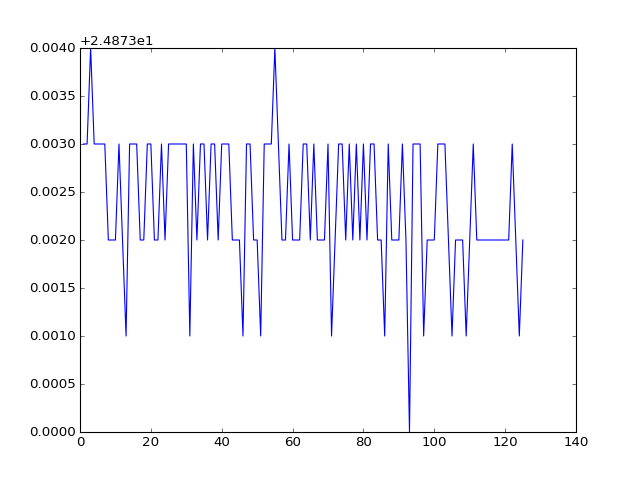

In [28]:
fig, ax = plt.subplots()
ax.plot(d['t_hlens'])

# Save scaler data to CSV file

In [29]:
d.to_csv('data.csv')

In [30]:
ls

data.csv  suitcase_demo.ipynb


In [31]:
csv_data = pd.read_csv('data.csv')

In [33]:
#csv_data.tail(10)

# Use export function to output all the data into h5 file

In [44]:
sc.export?

### output all the data

In [50]:
fname = 'data_13123.h5'
sc.export(hdr, fname, use_uid=False)

In [19]:
# if the file already exists, we need to remove it
!rm data_13123_1.h5

### output data with selected fields

In [13]:
fds = ['xspress3_ch1', 'xspress3_ch2', 'xspress3_ch3']

In [20]:
fname = 'data_13123_1.h5'
sc.export(hdr, fname, fields=fds, use_uid=False)

### output data by excluding certain fields

In [21]:
tmp = ['xspress3_ch1']
fname = 'data_13123_2.h5'
fds = sc.filter_fields(hdr, tmp)
sc.export(hdr, fname, fields=fds, use_uid=False)